In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("../input/europe-hotel-satisfaction-score/Europe Hotel Booking Satisfaction Score.csv")
pd.set_option('display.max_columns', None)
proc_df = df.copy()
proc_df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [65]:
categorical_columns = [
    "purpose_of_travel", "Type of Travel", "Type Of Booking", "Gender"
]

proc_df[categorical_columns] = proc_df[categorical_columns].astype(str)
dummies = pd.get_dummies(proc_df[categorical_columns], prefix=categorical_columns) 
proc_df = pd.concat([proc_df, dummies], axis=1)
proc_df.drop(categorical_columns, inplace=True, axis=1)

proc_df.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,70172,13,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied,0,1,0,0,0,0,1,0,0,1,0,1
1,5047,25,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied,0,0,0,0,1,1,0,1,0,0,0,1
2,110028,26,2,2,2,2,5,5,5,4,4,5,satisfied,0,0,0,0,1,1,0,1,0,0,1,0
3,24026,25,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied,0,0,0,0,1,1,0,1,0,0,1,0
4,119299,61,3,3,3,3,4,5,3,3,3,3,satisfied,0,1,0,0,0,1,0,1,0,0,0,1


In [66]:
proc_df['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)

proc_df.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,70172,13,3,4,3,1,5,5,5,4,5,5,0,0,1,0,0,0,0,1,0,0,1,0,1
1,5047,25,3,2,3,3,1,1,1,1,4,1,0,0,0,0,0,1,1,0,1,0,0,0,1
2,110028,26,2,2,2,2,5,5,5,4,4,5,1,0,0,0,0,1,1,0,1,0,0,1,0
3,24026,25,2,5,5,5,2,2,2,1,4,2,0,0,0,0,0,1,1,0,1,0,0,1,0
4,119299,61,3,3,3,3,4,5,3,3,3,3,1,0,1,0,0,0,1,0,1,0,0,0,1


In [67]:
proc_df.columns

rating_columns = [
    'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness'
]

proc_df[rating_columns] /= 5

proc_df.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,70172,13,0.6,0.8,0.6,0.2,1.0,1.0,1.0,0.8,1.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,5047,25,0.6,0.4,0.6,0.6,0.2,0.2,0.2,0.2,0.8,0.2,0,0,0,0,0,1,1,0,1,0,0,0,1
2,110028,26,0.4,0.4,0.4,0.4,1.0,1.0,1.0,0.8,0.8,1.0,1,0,0,0,0,1,1,0,1,0,0,1,0
3,24026,25,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.2,0.8,0.4,0,0,0,0,0,1,1,0,1,0,0,1,0
4,119299,61,0.6,0.6,0.6,0.6,0.8,1.0,0.6,0.6,0.6,0.6,1,0,1,0,0,0,1,0,1,0,0,0,1


In [68]:
scaler = StandardScaler()
proc_df['Age'] = scaler.fit_transform(proc_df[['Age']])

proc_df.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,70172,-1.745279,0.6,0.8,0.6,0.2,1.0,1.0,1.0,0.8,1.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,5047,-0.951360,0.6,0.4,0.6,0.6,0.2,0.2,0.2,0.2,0.8,0.2,0,0,0,0,0,1,1,0,1,0,0,0,1
2,110028,-0.885200,0.4,0.4,0.4,0.4,1.0,1.0,1.0,0.8,0.8,1.0,1,0,0,0,0,1,1,0,1,0,0,1,0
3,24026,-0.951360,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.2,0.8,0.4,0,0,0,0,0,1,1,0,1,0,0,1,0
4,119299,1.430397,0.6,0.6,0.6,0.6,0.8,1.0,0.6,0.6,0.6,0.6,1,0,1,0,0,0,1,0,1,0,0,0,1


In [69]:
proc_df.drop(['id'], axis=1, inplace=True)

proc_df.head()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,-1.745279,0.6,0.8,0.6,0.2,1.0,1.0,1.0,0.8,1.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,-0.951360,0.6,0.4,0.6,0.6,0.2,0.2,0.2,0.2,0.8,0.2,0,0,0,0,0,1,1,0,1,0,0,0,1
2,-0.885200,0.4,0.4,0.4,0.4,1.0,1.0,1.0,0.8,0.8,1.0,1,0,0,0,0,1,1,0,1,0,0,1,0
3,-0.951360,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.2,0.8,0.4,0,0,0,0,0,1,1,0,1,0,0,1,0
4,1.430397,0.6,0.6,0.6,0.6,0.8,1.0,0.6,0.6,0.6,0.6,1,0,1,0,0,0,1,0,1,0,0,0,1


In [70]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [71]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(proc_df)

pca_proc_df = pd.DataFrame({'pc1': pca_result[:,0], 'pc2': pca_result[:,1], 'label': proc_df.satisfaction})



In [72]:
tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
tsne_result = tsne.fit_transform(proc_df)

tsne_proc_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': proc_df.satisfaction})

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Text(0, 0.5, 'tsne_2')

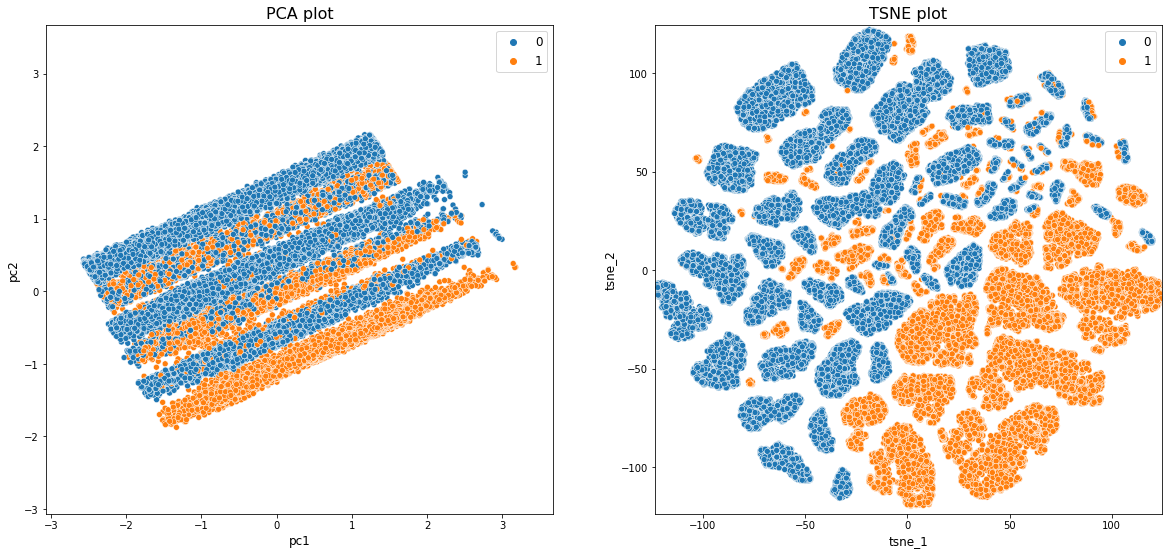

In [91]:
fig, ax = plt.subplots(1,2, figsize = (20, 9))

sns.scatterplot(x='pc1', y='pc2', hue='label', data=pca_proc_df, ax=ax[0], s=35)
lim = (pca_result.min()-.5, pca_result.max()+.5)
ax[0].set_xlim(lim)
ax[0].set_ylim(lim)
ax[0].set_title('PCA plot', fontsize= 16)
ax[0].legend(fontsize = 12)
ax[0].set_xlabel('pc1', fontsize = 12)
ax[0].set_ylabel('pc2', fontsize = 12)

sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_proc_df, ax=ax[1], s=35)
lim = (tsne_result.min()-.5, tsne_result.max()+.5)
ax[1].set_xlim(lim)
ax[1].set_ylim(lim)
ax[1].set_title('TSNE plot', fontsize= 16)
ax[1].legend(fontsize = 12)
ax[1].set_xlabel('tsne_1', fontsize = 12)
ax[1].set_ylabel('tsne_2', fontsize = 12)
